# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Decaluwé Maxime - 50802200

Part. 2: Defrenne Simon - 42242200

Part. 3: Mil-Homens Cavaco Mathieu - 38282200
 
Part. 4: Peiffer Thibaut - 47352200

Part. 5: Roekens Raphaël - 70732200

Part. 6: Starck Robin - 88952200


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


In [2]:
# Imports
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [3]:
'''
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!     
!!!!!!!!!!!!!!ATENTION IL NE FAUT GARDER QUE CERTAINES DATES !!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
'''
#Load les csv en dataframe
beijing_df = pd.read_csv('BeijingPM.csv')
shanghai_df = pd.read_csv('ShanghaiPM.csv')

#Définir la colonne qu'on analyse
target_column = 'PM_US Post'

#Filtrer les dataframe de façon à ne garder que les entrées où on a une valeur pour Shanghai et Beijing
valid_beijing = beijing_df[~pd.isna(beijing_df[target_column]) & ~pd.isna(shanghai_df[target_column])]
valid_shanghai = shanghai_df[~pd.isna(beijing_df[target_column]) & ~pd.isna(shanghai_df[target_column])]

#Filtrer les dataframe "communs" en saison summer et winter
valid_beijing_winter = valid_beijing[valid_beijing["season"] == 4]
valid_shanghai_winter = valid_shanghai[valid_shanghai["season"] == 4]

valid_beijing_summer = valid_beijing[valid_beijing["season"] == 2]
valid_shanghai_summer = valid_shanghai[valid_shanghai["season"] == 2]


b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [4]:
# Code here
# À faire pour les deux en même temps ? (moyenne/variance/mediane globale ?)
be_mean_winter = valid_beijing_winter.loc[:, target_column].mean()
be_mean_summer = valid_beijing_summer.loc[:, target_column].mean()
sh_mean_winter = valid_shanghai_winter.loc[:, target_column].mean()
sh_mean_summer = valid_shanghai_summer.loc[:, target_column].mean()

be_var_winter = valid_beijing_winter.loc[:, target_column].var()
be_var_summer = valid_beijing_summer.loc[:, target_column].var()
sh_var_winter = valid_shanghai_winter.loc[:, target_column].var()
sh_var_summer = valid_shanghai_summer.loc[:, target_column].var()

be_median_winter = valid_beijing_winter.loc[:, target_column].median()
be_median_summer = valid_beijing_summer.loc[:, target_column].median()
sh_median_winter = valid_shanghai_winter.loc[:, target_column].median()
sh_median_summer = valid_shanghai_summer.loc[:, target_column].median()

be_quant25_winter = valid_beijing_winter.loc[:, target_column].quantile(0.25)
be_quant25_summer = valid_beijing_summer.loc[:, target_column].quantile(0.25)
sh_quant25_winter = valid_shanghai_winter.loc[:, target_column].quantile(0.25)
sh_quant25_summer = valid_shanghai_summer.loc[:, target_column].quantile(0.25)

be_quant75_winter = valid_beijing_winter.loc[:, target_column].quantile(0.75)
be_quant75_summer = valid_beijing_summer.loc[:, target_column].quantile(0.75)
sh_quant75_winter = valid_shanghai_winter.loc[:, target_column].quantile(0.75)
sh_quant75_summer = valid_shanghai_summer.loc[:, target_column].quantile(0.75)

print("Means for Beijing & Shanghai winter:")
print(be_mean_winter)
print(sh_mean_winter)
print("Means for Beijing & Shanghai summer:")
print(be_mean_summer)
print(sh_mean_summer)

print("Variances for Beijing & Shanghai winter")
print(be_var_winter)
print(sh_var_winter)
print("Variances for Beijing & Shanghai summer")
print(be_var_summer)
print(sh_var_summer)

print("Medians for Beijing & Shanghai winter")
print(be_median_winter)
print(sh_median_winter)
print("Medians for Beijing & Shanghai summer")
print(be_median_summer)
print(sh_median_summer)

print("25 % quantiles for Beijing & Shanghai winter")
print(be_quant25_winter)
print(sh_quant25_winter)
print("25 % quantiles for Beijing & Shanghai summer")
print(be_quant25_summer)
print(sh_quant25_summer)

print("75 % quantiles for Beijing & Shanghai winter")
print(be_quant75_winter)
print(sh_quant75_winter)
print("75 % quantiles for Beijing & Shanghai summer")
print(be_quant75_summer)
print(sh_quant75_summer)






Means for Beijing & Shanghai winter:
122.42691387559809
76.19473684210526
Means for Beijing & Shanghai summer:
71.84084337349398
33.89180722891566
Variances for Beijing & Shanghai winter
15509.29983782486
3341.130873121312
Variances for Beijing & Shanghai summer
2978.2273471618737
611.4814848646303
Medians for Beijing & Shanghai winter
82.0
60.0
Medians for Beijing & Shanghai summer
59.0
29.0
25 % quantiles for Beijing & Shanghai winter
21.0
36.0
25 % quantiles for Beijing & Shanghai summer
30.0
16.0
75 % quantiles for Beijing & Shanghai winter
180.0
99.0
75 % quantiles for Beijing & Shanghai summer
100.0
46.0


### Statistics for Beijing & Shanghai

<table>
    <tr>
        <th rowspan="2">City</th>
        <th rowspan="2">Season</th>
        <th>Mean</th>
        <th>Variance</th>
        <th>Median</th>
        <th>25% Quantile</th>
        <th>75% Quantile</th>
    </tr>
    <tr></tr>
    <tr>
        <td rowspan="2">Beijing</td>
        <td>Winter</td>
        <td><code>122.42691387559809</code></td>
        <td><code>15509.29983782486</code></td>
        <td><code>82.0</code></td>
        <td><code>21.0</code></td>
        <td><code>180.0</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>71.84084337349398</code></td>
        <td><code>2978.2273471618737</code></td>
        <td><code>59.0</code></td>
        <td><code>30.0</code></td>
        <td><code>100.0</code></td>
    </tr>
    <tr>
        <td rowspan="2">Shanghai</td>
        <td>Winter</td>
        <td><code>76.19473684210526</code></td>
        <td><code>3341.130873121312</code></td>
        <td><code>60.0</code></td>
        <td><code>36.0</code></td>
        <td><code>99.0</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>33.89180722891566</code></td>
        <td><code>611.4814848646303</code></td>
        <td><code>29.0</code></td>
        <td><code>16.0</code></td>
        <td><code>46.0</code></td>
    </tr>
</table>

Comments here:



-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



In [5]:
# Beaux plots des PM ?
# 1 box plot par ville et par saison, en prenant toutes les données d'une même saison (graphe = boite à moustache, voir internet)
# Résultats à comparer avec le niveau recommandé sur internet.

Comments here:


## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [6]:
# définition des listes de datas
US_data_beijing_summer = valid_beijing_summer[target_column].to_numpy()
US_data_beijing_winter = valid_beijing_winter[target_column].to_numpy()
US_data_shangai_summer = valid_shanghai_summer[target_column].to_numpy()
US_data_shangai_winter = valid_shanghai_winter[target_column].to_numpy()

# MLE sur chaque groupe de data
beijing_fit_summer = st.gamma.fit(US_data_beijing_summer, floc=0)
beijing_fit_winter = st.gamma.fit(US_data_beijing_winter)
shangai_fit_summer = st.gamma.fit(US_data_shangai_summer)
shangai_fit_winter = st.gamma.fit(US_data_shangai_winter, floc=0)


# Pour plot les gammas : 
# x = np.linspace(0,500,1000)
# plt.plot(x,st.gamma(*beijing_fit_summer).pdf(x))
print(st.gamma.mean(*shangai_fit_winter))
print(np.mean(US_data_shangai_winter))

76.19473684210526
76.19473684210526


b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

In [7]:
#print(min(US_data_beijing_summer)) #print(max(US_data_beijing_summer))
#print(min(US_data_beijing_winter)) #print(max(US_data_beijing_winter))
#print(min(US_data_shangai_summer)) #print(max(US_data_shangai_summer))
#print(min(US_data_shangai_winter)) #print(max(US_data_shangai_winter))
# p
i=((10+1)/10)
print(i)
print(4//i)

1.1
3.0


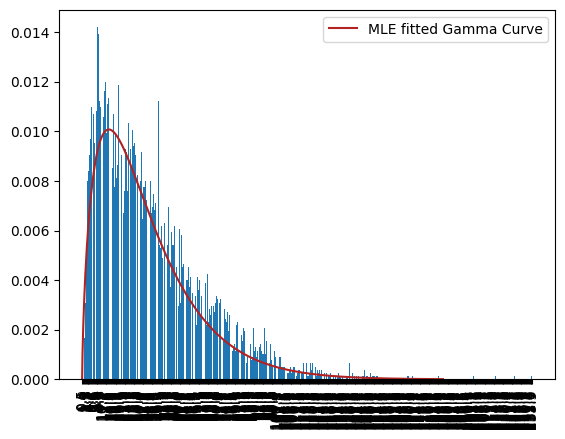

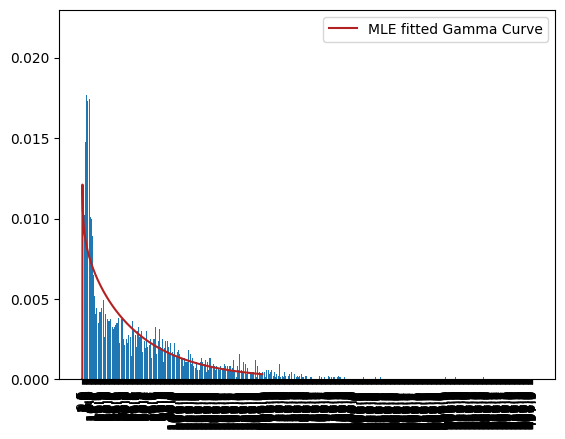

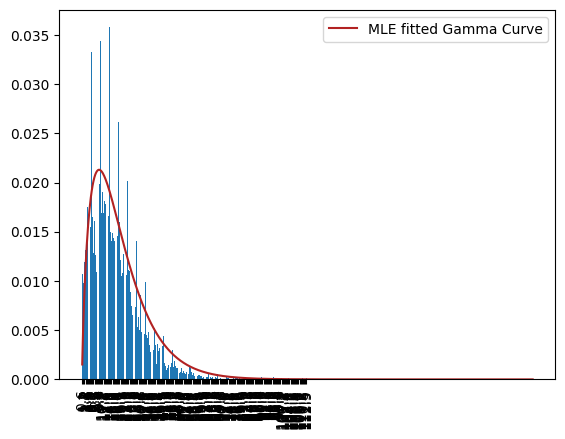

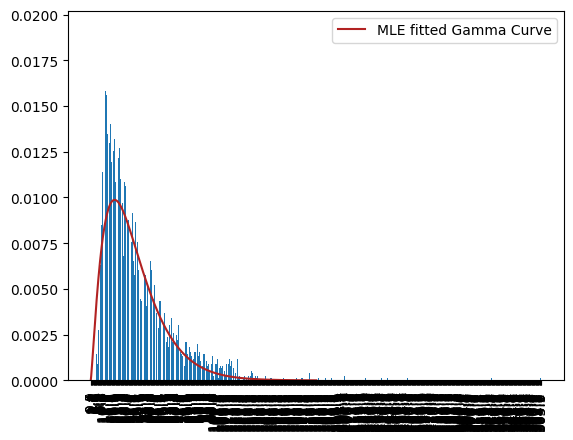

In [8]:
# grouper les datas par classes
data = [US_data_beijing_summer, US_data_beijing_winter, US_data_shangai_summer, US_data_shangai_winter] #Imbriquer les listes
data_gamma = [beijing_fit_summer, beijing_fit_winter, shangai_fit_summer, shangai_fit_winter]
n = np.array([500,1000,200,800]) #nombre d'intervalles
interv = np.zeros(4)
for i in range(4):
    L = np.zeros((4,n[i]))
    interv[i]=(max(data[i])+1)/n[i]
    for num in data[i]:
        L[i, int(num//(interv[i]))] += 1
    L[i] /= len(data[i])
    # plot un graphe [# mesures dans un intervalle I / # mesures au total]
    names=[""]*n[i]
    intervMid = interv[i]/2
    for m in range(n[i]):
        names[m]="{:.1f}".format(intervMid*(m+1))
    values=L[i]
    plt.bar(names,values/interv[i])
    

    x = np.linspace(0,400,1000)
    plt.plot(x,st.gamma.pdf(x,*(data_gamma[i])), label="MLE fitted Gamma Curve",color = 'firebrick') 
    plt.xticks(fontsize=10, rotation=90)
    plt.legend()
    plt.show()
    #Faire en sorte que la largeur de la baare = intervalle + réduire les blancs

Comments here:


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

### Formules analytiques de la loi Γ 

$ f_\Gamma(x,\alpha, \beta) = \frac{1}{\Gamma(\alpha) \beta^\alpha} x^{\alpha-1} \exp(-\frac{x}{\beta})$

Avec : 
$ \mathbb{E}[\Gamma] = \alpha \beta , \quad \mathbb{V}[\Gamma] = \sigma^2 = \alpha \beta^2$



In [9]:
# Calcul de l'espérance et de l'écart type de la Gamma calculée
E_beijing_fit_summer = st.gamma.mean(*beijing_fit_summer)
sigma_beijing_fit_summer = st.gamma.std(*beijing_fit_summer)
q25_beijing_fit_summer = st.gamma.ppf(0.25, *beijing_fit_summer)
q50_beijing_fit_summer = st.gamma.ppf(0.50, *beijing_fit_summer)
q75_beijing_fit_summer = st.gamma.ppf(0.75, *beijing_fit_summer)
print("Beijing summer : Espérance, Déviation std, q25, q50, q75")
print([E_beijing_fit_summer,sigma_beijing_fit_summer,q25_beijing_fit_summer,q50_beijing_fit_summer,q75_beijing_fit_summer])

E_beijing_fit_winter = st.gamma.mean(*beijing_fit_winter)
sigma_beijing_fit_winter = st.gamma.std(*beijing_fit_winter)
q25_beijing_fit_winter = st.gamma.ppf(0.25, *beijing_fit_winter)
q50_beijing_fit_winter = st.gamma.ppf(0.50, *beijing_fit_winter)
q75_beijing_fit_winter = st.gamma.ppf(0.75, *beijing_fit_winter)
print("Beijing winter : Espérance, Déviation std, q25, q50, q75")
print([E_beijing_fit_winter,sigma_beijing_fit_winter,q25_beijing_fit_winter,q50_beijing_fit_winter,q75_beijing_fit_winter])

E_shangai_fit_summer = st.gamma.mean(*shangai_fit_summer)
sigma_shangai_fit_summer = st.gamma.std(*shangai_fit_summer)
q25_shangai_fit_summer = st.gamma.ppf(0.25, *shangai_fit_summer)
q50_shangai_fit_summer = st.gamma.ppf(0.50, *shangai_fit_summer)
q75_shangai_fit_summer = st.gamma.ppf(0.75, *shangai_fit_summer)
print("Shangai summer : Espérance, Déviation std, q25, q50, q75")
print([E_shangai_fit_summer,sigma_shangai_fit_summer,q25_shangai_fit_summer,q50_shangai_fit_summer,q75_shangai_fit_summer])

E_shangai_fit_winter = st.gamma.mean(*shangai_fit_winter)
sigma_shangai_fit_winter = st.gamma.std(*shangai_fit_winter)
q25_shangai_fit_winter = st.gamma.ppf(0.25, *shangai_fit_winter)
q50_shangai_fit_winter = st.gamma.ppf(0.50, *shangai_fit_winter)
q75_shangai_fit_winter = st.gamma.ppf(0.75, *shangai_fit_winter)
print("Shangai winter : Espérance, Déviation std, q25, q50, q75")
print([E_shangai_fit_winter,sigma_shangai_fit_winter,q25_shangai_fit_winter,q50_shangai_fit_winter,q75_shangai_fit_winter])



Beijing summer : Espérance, Déviation std, q25, q50, q75
[71.84084337349398, 55.08648062781376, 31.494866041648617, 58.35607189534869, 97.71242329768053]
Beijing winter : Espérance, Déviation std, q25, q50, q75
[122.71554375589547, 126.9770264931966, 33.00171936975363, 82.44569641084038, 169.7209507118363]
Shangai summer : Espérance, Déviation std, q25, q50, q75
[33.891787895682995, 25.403505811584445, 15.262996932825997, 27.833132747324008, 46.01145498276669]
Shangai winter : Espérance, Déviation std, q25, q50, q75
[76.19473684210526, 50.80078879223677, 38.84639322710452, 65.25060469888994, 101.74969628093264]


### Statistics for Beijing & Shanghai

<table>
    <tr>
        <th rowspan="2">City</th>
        <th rowspan="2">Season</th>
        <th>MLE Mean</th>
        <th>MLE Standard deviation</th>
        <th>MLE 25% Quantile</th>
        <th>MLE Median</th>
        <th>MLE 75% Quantile</th>
    </tr>
    <tr></tr>
    <tr>
        <td rowspan="2">Beijing</td>
        <td>Winter</td>
        <td><code>122.7155437</code></td>
        <td><code>126.9770264</code></td>
        <td><code>33.0017193</code></td>
        <td><code>82.44569641</code></td>
        <td><code>169.7209507</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>71.84087040</code></td>
        <td><code>55.63626784</code></td>
        <td><code>31.49486604</code></td>
        <td><code>58.35607189</code></td>
        <td><code>97.71242329</code></td>
    </tr>
    <tr>
        <td rowspan="2">Shanghai</td>
        <td>Winter</td>
        <td><code>76.19473684</code></td>
        <td><code>50.80078879</code></td>
        <td><code>38.84639322</code></td>
        <td><code>65.25060469</code></td>
        <td><code>101.7496962</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>33.891787895</code></td>
        <td><code>25.403505811</code></td>
        <td><code>15.262996932</code></td>
        <td><code>27.833132747</code></td>
        <td><code>46.01145498</code></td>
    </tr>
</table>

------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  0.84113464 135.49077878]


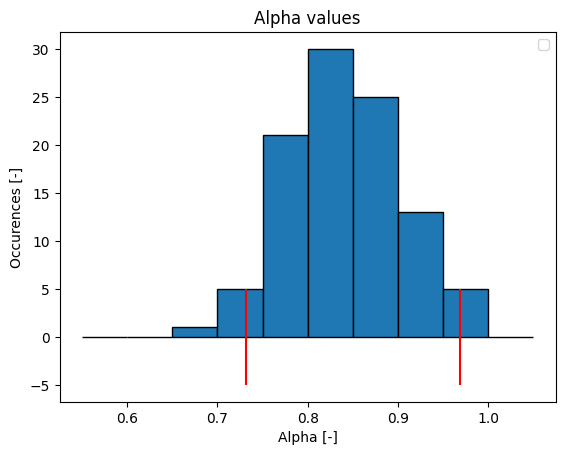

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


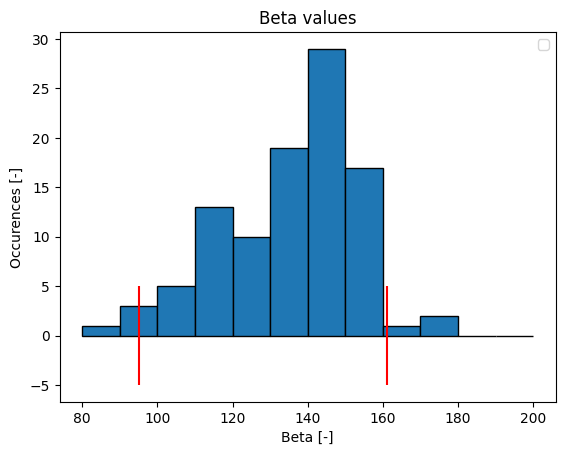

In [13]:
# FAIRE 1000 échantillons de 6000 (100,600 pour compiler vite)
# VOIR FORMULAIRE (MERCI THIBAUT :  ALPHA = PARAMETRE α DE LA GAMMA ! SCALE = l'autre β)

#bootstrap algo
result = np.empty((2,100))
for i in range (100):
    sample = np.random.choice(valid_beijing_winter.loc[:, target_column], 600, replace=True )
    result[0][i]=st.gamma.fit(sample)[0]
    result[1][i]=st.gamma.fit(sample)[2]

mean_param = result.mean(1)

#TODO : confidence interval+

# print(result)
# print()
# print(np.max(result,axis=1))
# print(np.min(result,axis=1))
# print()
print(mean_param)

#confidence interval
alpha_lower = np.percentile(result[0], 2.5)
alpha_upper = np.percentile(result[0], 97.5)
beta_lower = np.percentile(result[1], 2.5)
beta_upper = np.percentile(result[1], 97.5)

#histograms (graphe à retravailler)
alphabins = [0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1,1.05]
plt.hist(result[0],bins=alphabins, edgecolor='black')
plt.vlines(alpha_lower,-5,5,color ='red')
plt.vlines(alpha_upper,-5,5,color ='red')
plt.title('Alpha values')
plt.xlabel('Alpha [-]')
plt.ylabel('Occurences [-]')
plt.legend()
plt.show()

betabins = [80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.hist(result[1],bins=betabins, edgecolor='black')
plt.vlines(beta_lower,-5,5,color ='red')
plt.vlines(beta_upper,-5,5,color ='red')
plt.title('Beta values')
plt.xlabel('Beta [-]')
plt.ylabel('Occurences [-]')
plt.legend()
plt.show()


    

Comments here:


## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [52]:
# REGARDER C'EST QUOI OSL et le package STATSMODELS.api


Comments here:


------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [53]:
# à voir semaine 5


Comments here:

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

In [54]:
# à voir semaine 5


Comments here:


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

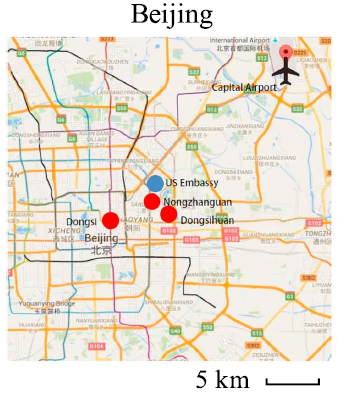


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [55]:
# Code here


b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [56]:
# Code here


Comment here:


c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [57]:
# Code here


Comment here:

